In [1]:
import proposal as pp
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

pp.InterpolationDef.path_to_tables = "/home/msackel/.local/share/PROPOSAL/"

N_SAMPLES = int(1e4)

In [2]:
args = {
    "particle_def": pp.particle.MuMinusDef(),
    "target": pp.medium.StandardRock(),
    "interpolate": True,
    "cuts": pp.EnergyCutSettings(500, 1, True)
}

cross = pp.crosssection.make_std_crosssection(**args)

In [5]:
initial_energy = 1e6
final_energy = 0.999e6
contrand = pp.make_contrand(cross, True)
std = np.sqrt(contrand.variance(initial_energy, final_energy))
randomized_energies = contrand.randomize(
    np.full(N_SAMPLES, initial_energy), 
    np.full(N_SAMPLES, final_energy), 
    np.linspace(0,1,N_SAMPLES)
)

/home/msackel/.local/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/msackel/.local/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


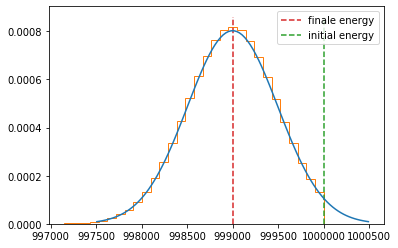

In [6]:
x = np.linspace(final_energy - 3*std, final_energy + 3*std, 100)
plt.plot(x, norm.pdf(x, final_energy, std))

n, _, _ = plt.hist(randomized_energies, bins = 30, histtype="step", density=True)

lines_args = {"ymin": 0, "ymax": 1.05*np.max(n), "linestyle":"dashed"}
plt.vlines(final_energy, colors="C3", label="finale energy", **lines_args)
plt.vlines(initial_energy, colors="C2", label="initial energy", **lines_args)
plt.legend(loc="best")